Pick a dataset, as mentioned on the previous page.

Pose at least three questions related to business or real-world applications of how the data could be used.

Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:
Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize
Provide a clear connection between your business questions and how the data answers them
Communicate your business insights:
Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [4]:
reviews = pd.read_csv('seatle/reviews.csv')
calendar = pd.read_csv('seatle/calendar.csv')
listings = pd.read_csv('seatle/listings.csv')

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
# convert dollar string to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['security_deposit'] = listings['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)



In [9]:

# convert percentage string to float
listings['host_response_rate'] = listings['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


In [10]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,94.886798,99.967159,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,11.866705,1.812201,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,17.000000,0.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,98.000000,100.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,100.000000,100.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,100.000000,100.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,100.000000,100.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


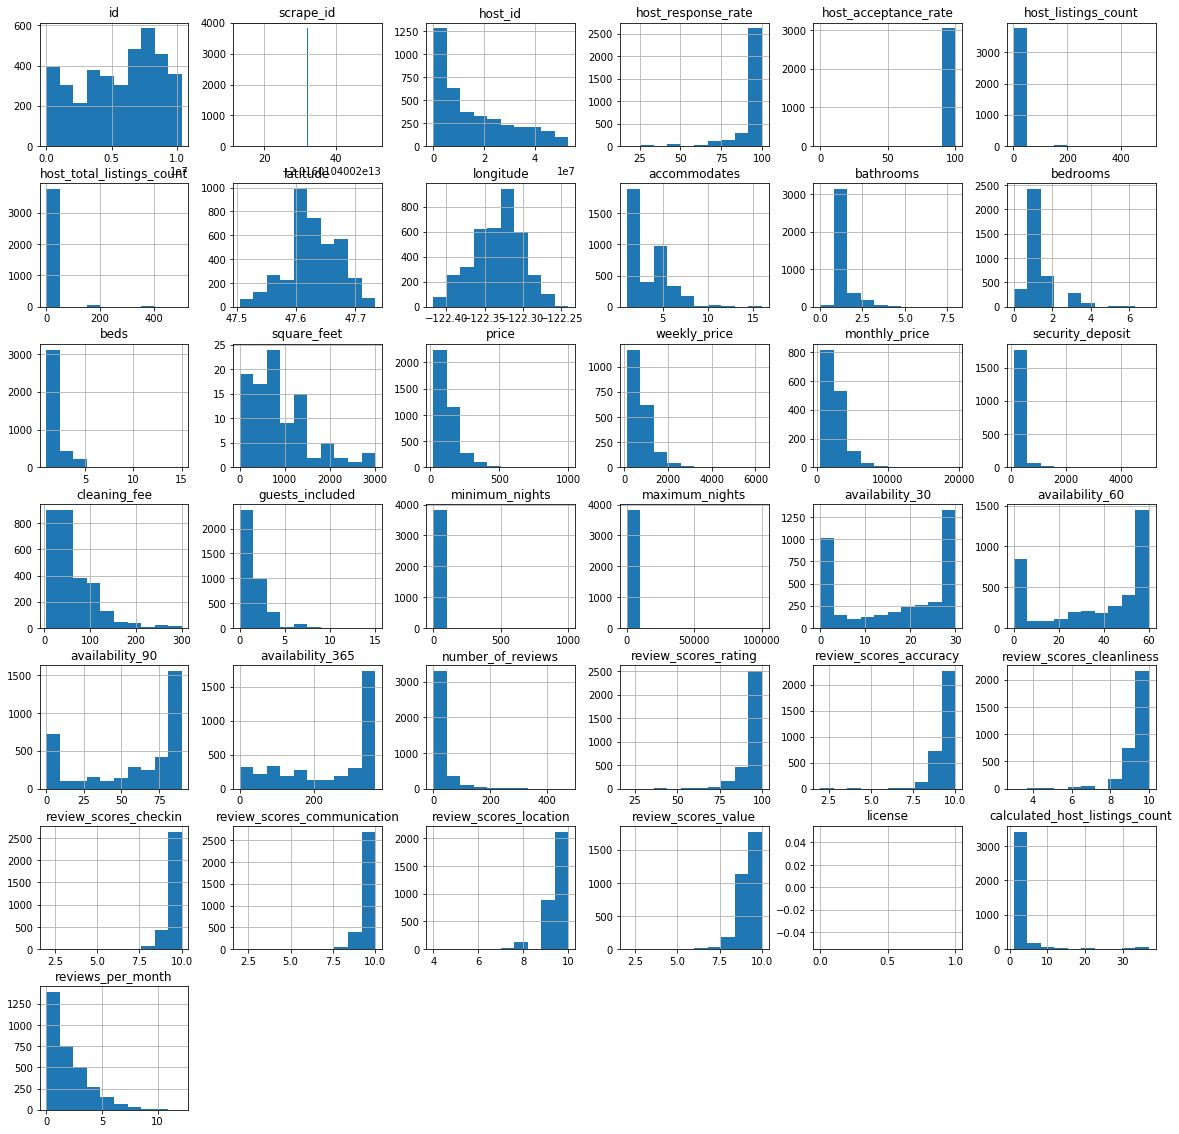

In [11]:
listings.hist(figsize=(20,20));

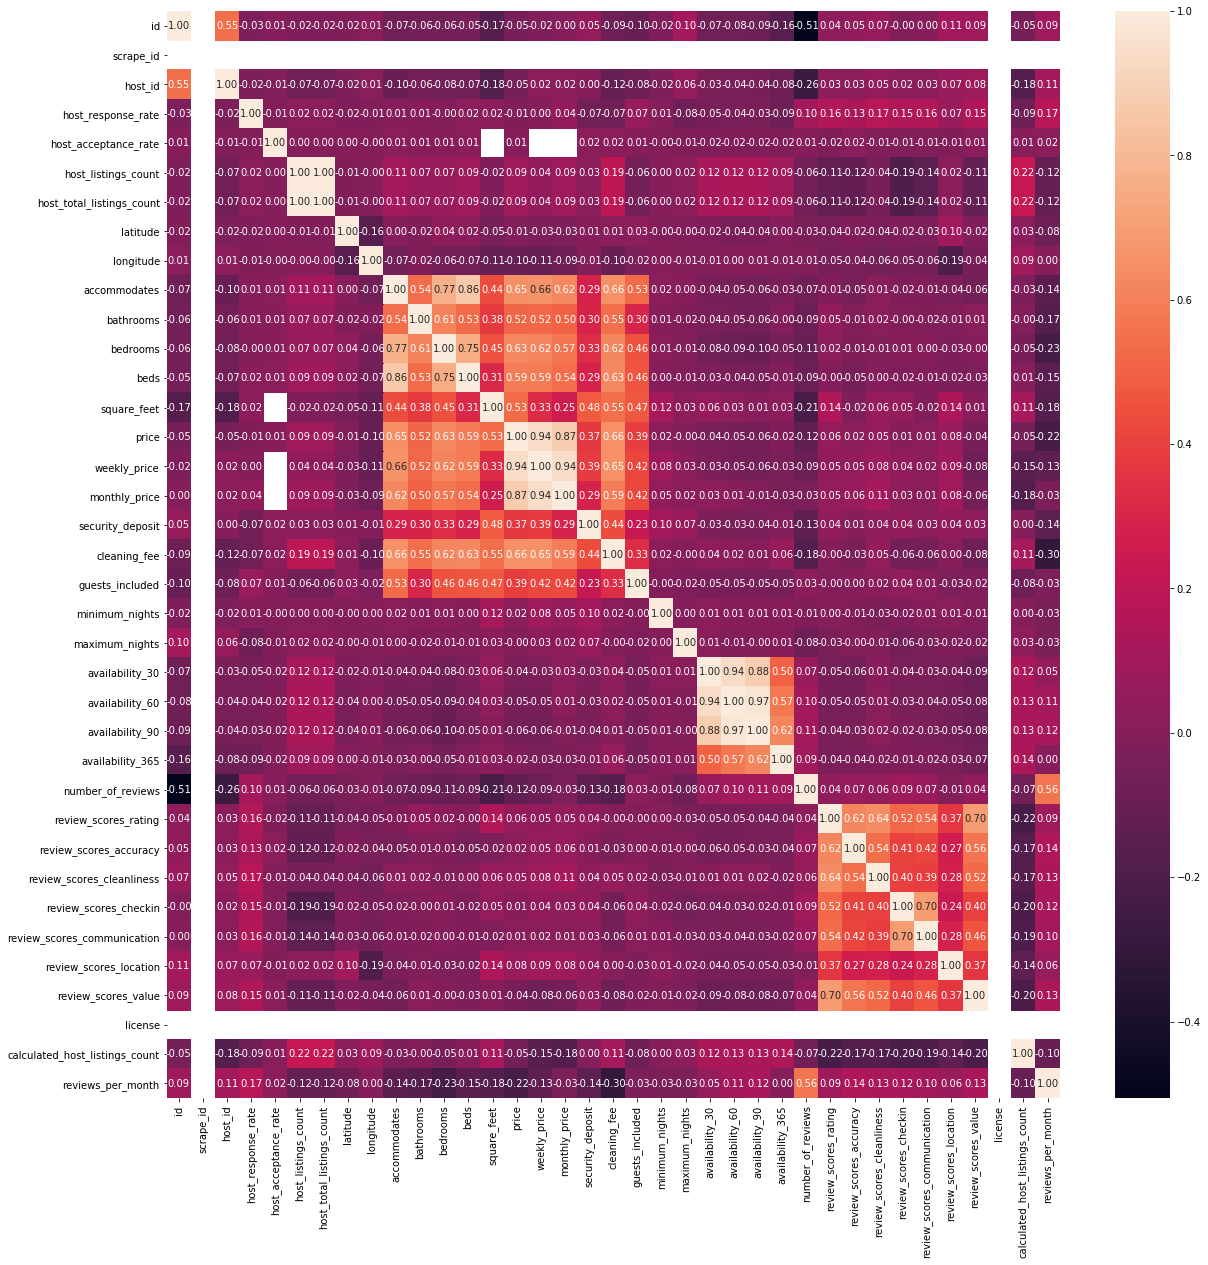

In [12]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(listings.corr(), fmt='.2f', annot=True, ax=ax)

Questions:

As someone who works remotely, I've always wanted to work from Seatle for an extended period of time. But deciding where and when to go is always a tricky question for me. What are the different vibes for different neighbourhoods? What's the busist time of year of the city, how prices change with that? 

* Supplies in each neighbourbood
* Characteristics of neighbourhoods in seatle. 
    * Can you describe the vibe of each Seattle neighborhood using listing descriptions?
* What are the busiest times of the year to visit Seattle? By how much do prices spike?



# Supplies

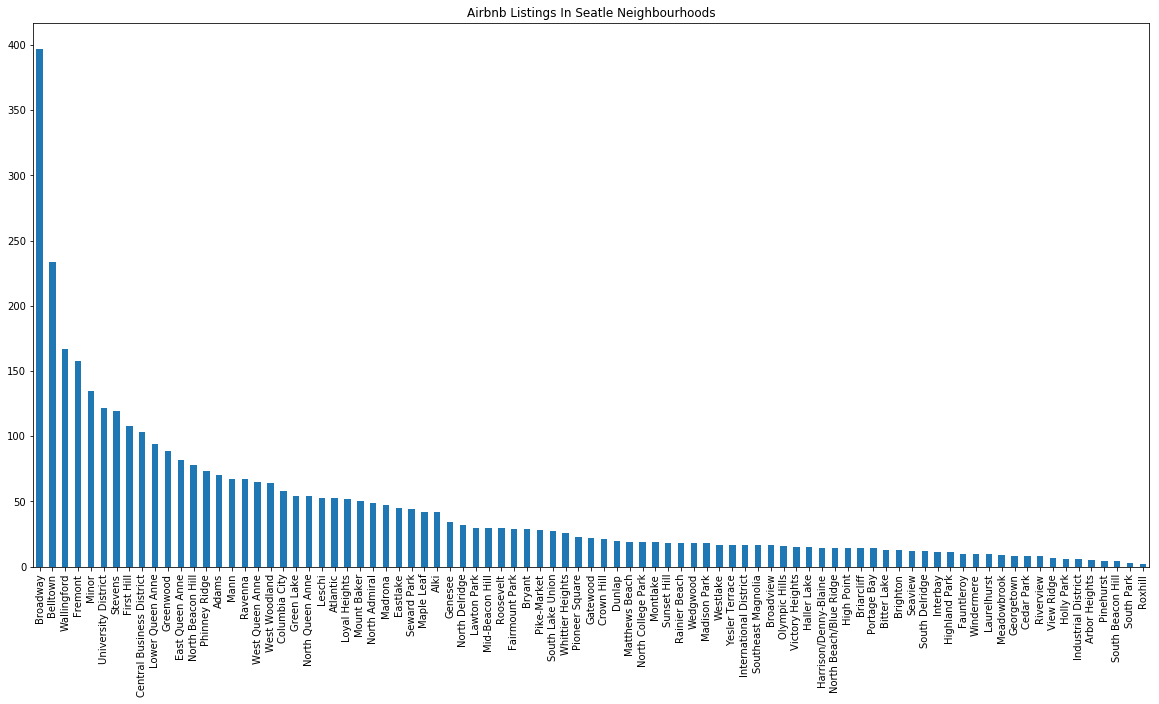

In [13]:
listings['neighbourhood_cleansed'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Airbnb Listings In Seatle Neighbourhoods');

Broadway and Belttown are the ones with largest supply. 

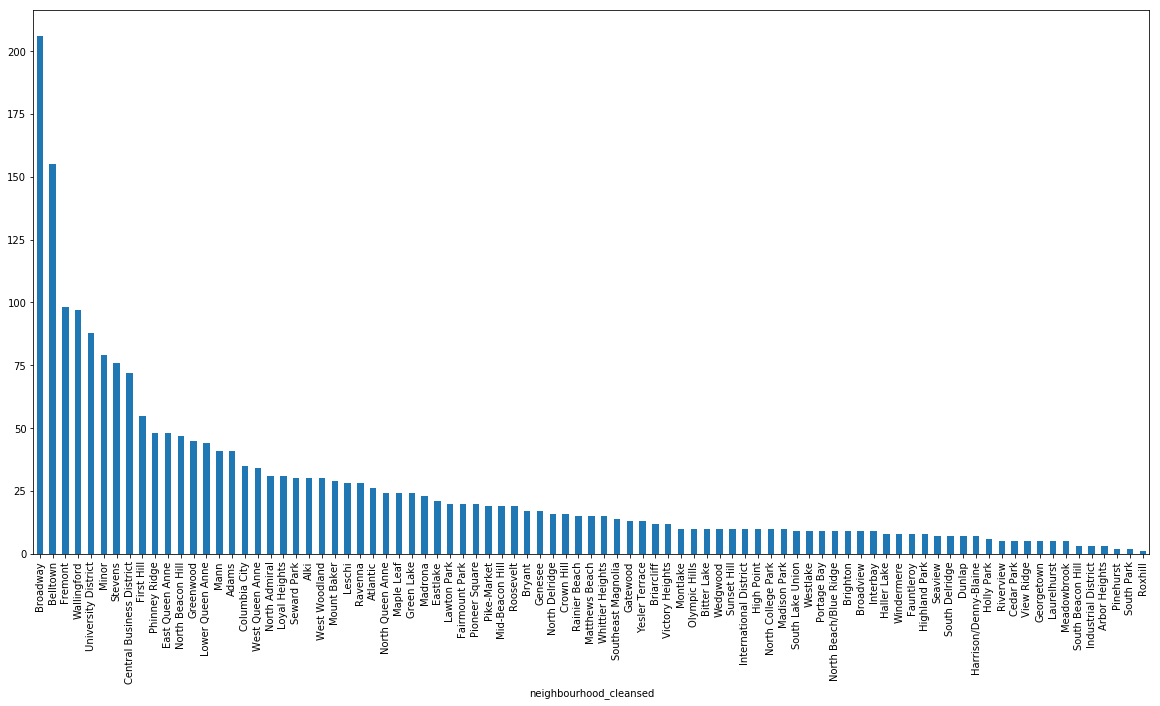

In [23]:
# Available listings - use availability 30> 0.5 
listings['availability_30_more_than_15'] = listings['availability_30']>15
listings.groupby('neighbourhood_cleansed').agg({'availability_30_more_than_15':'sum'}).sort_values(by='availability_30_more_than_15', ascending=False)['availability_30_more_than_15'].plot(kind='bar',figsize=(20,10))




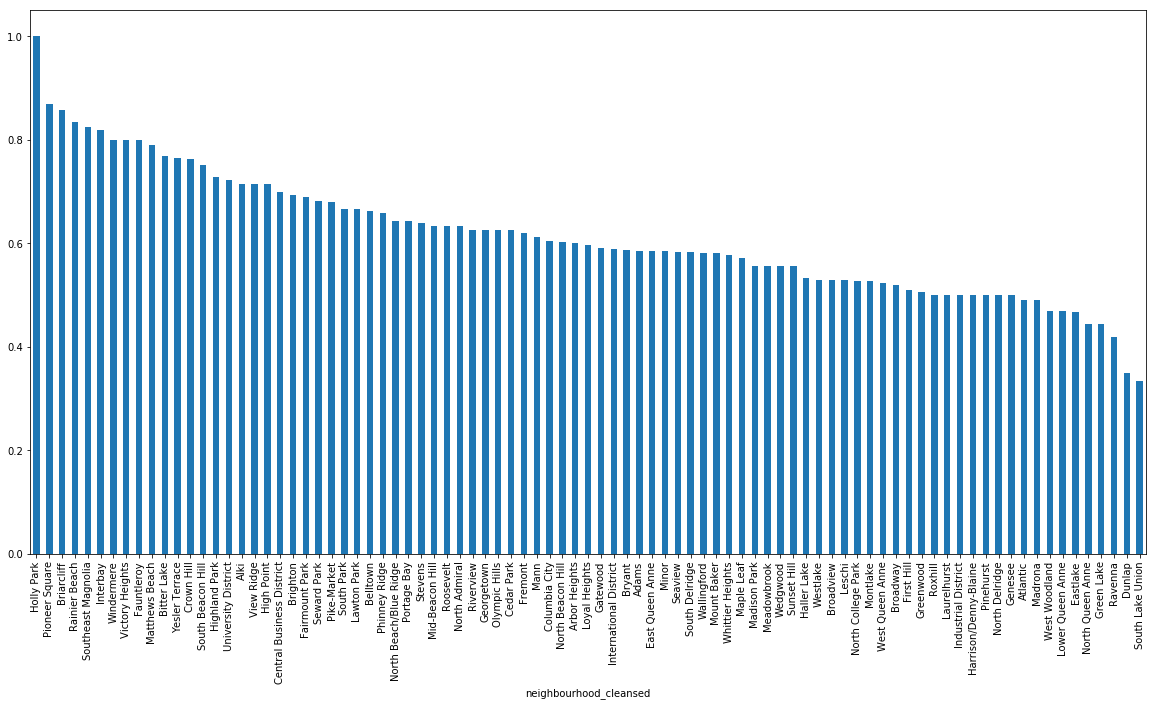

In [24]:
listings.groupby('neighbourhood_cleansed').agg({'availability_30_more_than_15':'mean'}).sort_values(by='availability_30_more_than_15', ascending=False)['availability_30_more_than_15'].plot(kind='bar',figsize=(20,10))



# Prices

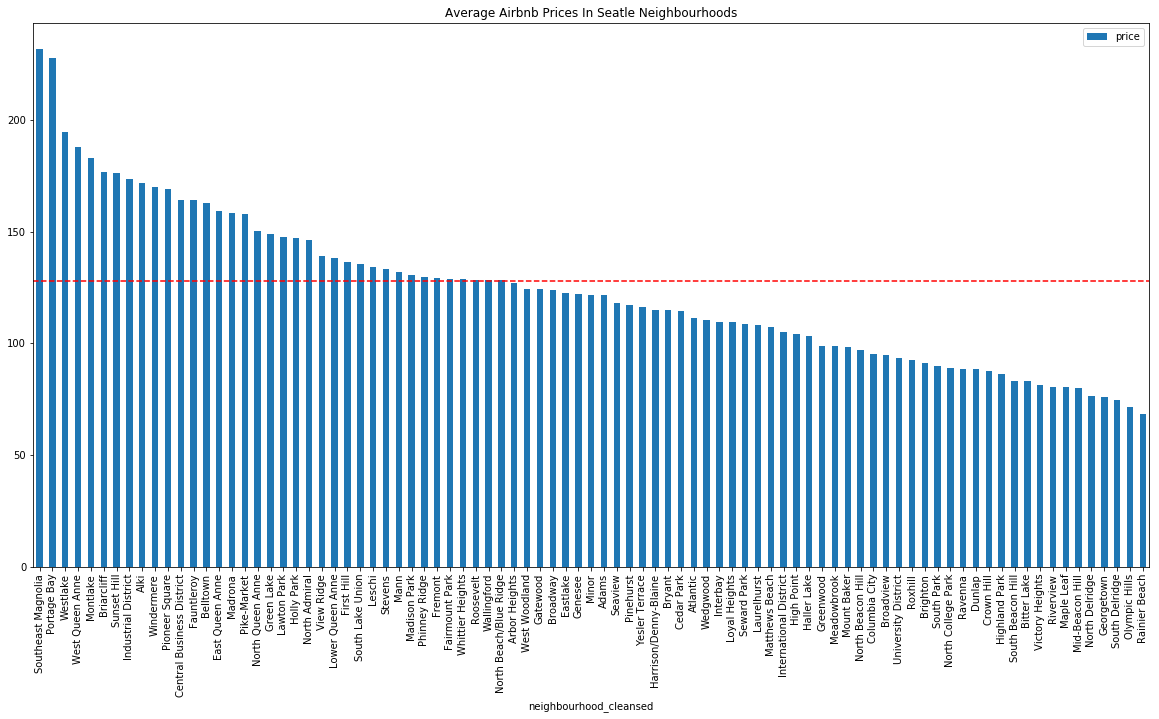

In [95]:
fig,ax=plt.subplots(figsize=(20,10))

listings.groupby(['neighbourhood_cleansed']).agg({'price':'mean'}).sort_values(by='price', ascending=False).plot(kind='bar',ax=ax)

city_average = listings['price'].mean()
# plot city average on chart
plt.axhline(y=city_average, color='r', linestyle='--',  label='City Average Price')
plt.title("Average Airbnb Prices In Seatle Neighbourhoods");


In [104]:
# check nulls
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [186]:
# Seasonality

calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar['month'] = calendar['date'].dt.to_period('M')
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

calendar['is_weekend'] = calendar['date'].apply(lambda x: 1 if x.dayofweek in [5,6] else 0)

calendar['is_available'] = pd.get_dummies(calendar[['available']], columns=['available'], prefix=['available'])['available_t']


In [153]:
calendar.head()

,listing_id,date,available,price,is_available,month,day_of_week,is_weekend
0,241032,2016-01-04,t,85.0,1,2016-01,0,0
1,241032,2016-01-05,t,85.0,1,2016-01,1,0
2,241032,2016-01-06,f,NaN,0,2016-01,2,0
3,241032,2016-01-07,f,NaN,0,2016-01,3,0
4,241032,2016-01-08,f,NaN,0,2016-01,4,0


In [199]:
# availability = calendar.groupby('month').agg({'is_available':'mean'}).reset_index()
# availability.plot(x='month', y='is_available', kind='bar', figsize=(12,8))
# plt.title('Average Listing Availability By Month')

Listings availability reflects how listings are booked, higher the availability, the less listings are booked.
The calendar was scraped on 2016-01-04, so the chart is reflecting future availability on that day. 

We could see July is definitely a peak season.

Text(0.5, 1.0, 'Average Listing Prices By Month')

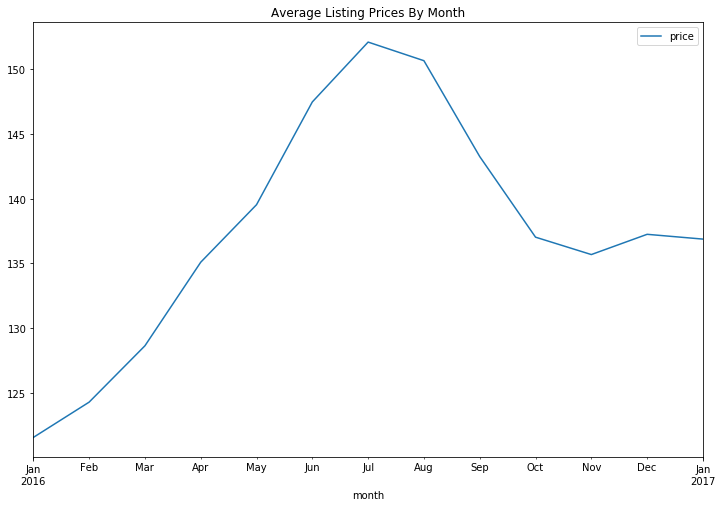

In [147]:
# Prices
availability = calendar.groupby('month').agg({'price':'mean'}).reset_index()
availability.plot(x='month', y='price', kind='line', figsize=(12,8))
plt.title('Average Listing Prices By Month')

Prices also peaks in July. Prices in the second half of year is higher than the first half. 

Text(0.5, 1.0, 'Airbnb Prices By Neighbourhood')

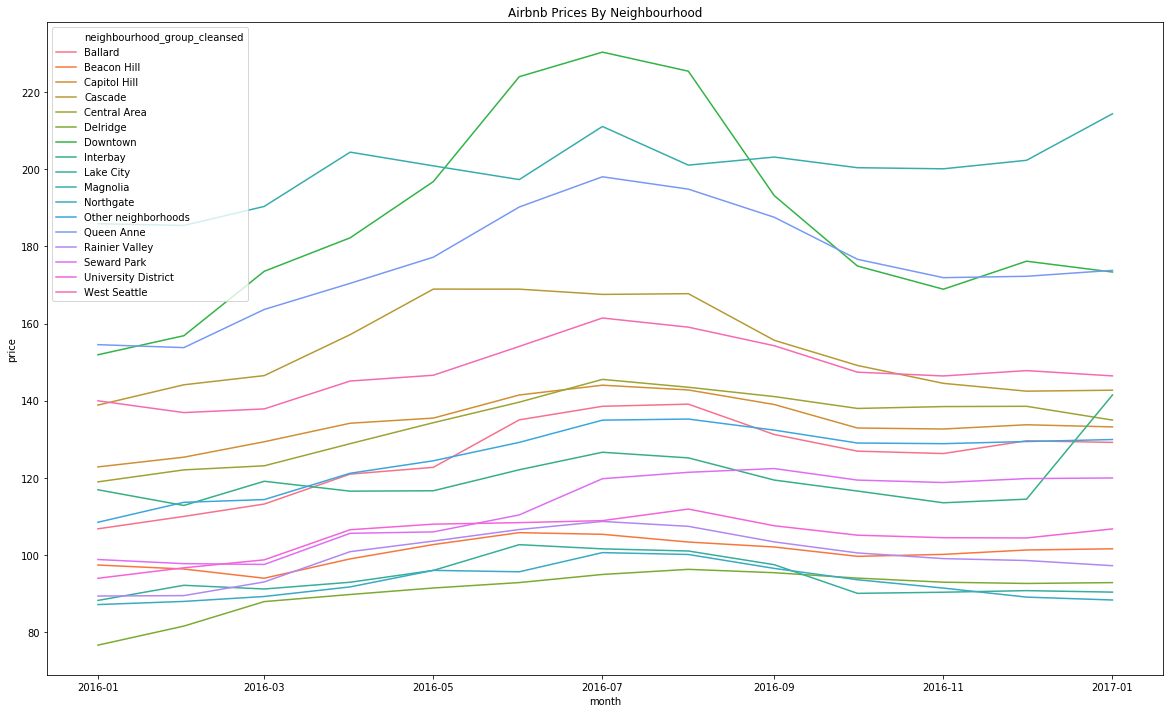

In [197]:
calendar2 = calendar.merge(listings[['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']], how='left', left_on='listing_id', right_on='id')
prices_agg = calendar2.groupby(['month', 'neighbourhood_group_cleansed']).agg({'price': 'mean'}).reset_index()
prices_agg['month'] = prices_agg['month'].apply(lambda x: x.start_time)
# prices_agg.head()
fig,ax=plt.subplots(figsize=(20,12))
sns.lineplot(data = prices_agg, x='month', y='price', hue='neighbourhood_group_cleansed', ax=ax)
plt.title('Airbnb Prices By Neighbourhood')

It's genuinely true for all neighbourhoods, but some neighbourhoods are less sensitive to seasonality. 

In [198]:
# weekly seasonality?

weekly_seasonality = calendar.groupby(['month', 'is_weekend']).agg({'price':'mean'}).reset_index().pivot_table(columns='is_weekend', index='month', values='price')
weekly_seasonality.rename({0:'Weekday', 1:'Weekend'}, axis=1, inplace=True)
weekly_seasonality['% Difference'] = weekly_seasonality['Weekend']/ weekly_seasonality['Weekday']-1

weekly_seasonality

is_weekend,Weekday,Weekend,% Difference
month,,,
2016-01,120.754001,123.581946,0.023419
2016-02,123.249671,127.040250,0.030755
2016-03,127.792072,131.089309,0.025802
2016-04,134.141484,137.347793,0.023902
2016-05,138.810376,141.316227,0.018052
2016-06,146.968422,148.867595,0.012922
2016-07,151.557614,153.222933,0.010988
2016-08,150.194369,151.983171,0.011910
2016-09,142.553225,145.193172,0.018519


Prices are generally more expensive on weekends

# Characteristics of Neighbourhoods

In [212]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [203]:
listings.neighborhood_overview

0                                                     NaN
1       Queen Anne is a wonderful, truly functional vi...
2       Upper Queen Anne is a charming neighborhood fu...
3                                                     NaN
4       We are in the beautiful neighborhood of Queen ...
                              ...                        
3813    We're located near lots of family fun. Woodlan...
3814    The neighborhood is a quiet oasis that is clos...
3815                                                  NaN
3816    Madison Park offers a peaceful slow pace upsca...
3817                                                  NaN
Name: neighborhood_overview, Length: 3818, dtype: object

In [204]:
listings.neighborhood_overview.isnull().mean()

0.27029858564693554

In [226]:
text = listings[['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'neighborhood_overview']].dropna()
# text['words'] = text['neighborhood_overview'].apply(lambda x: x.split(' '))
text['overview'] = text['neighborhood_overview'].apply(lambda x: x.lower())

In [227]:
text_by_neighbourhood_cleansed = text.groupby('neighbourhood_cleansed')['overview'].sum()

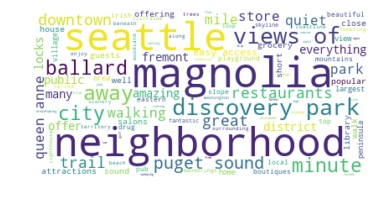

In [229]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(
    text_by_neighbourhood_cleansed['Southeast Magnolia']

)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

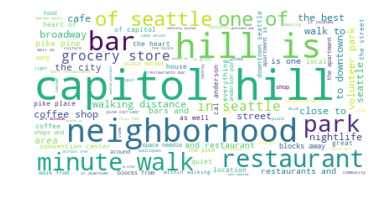

In [230]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_by_neighbourhood_cleansed['Broadway'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [258]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None): 
    '''
    A function for getting top bigrams of a text
    It takes a text corpus and a number n as input
    Returns top n bi-grams of from corpus with frequency excluding stop words
    '''
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [255]:
# for i in range(text_by_neighbourhood_cleansed.shape[0]):
#     common_words = get_top_n_bigram([text_by_neighbourhood_cleansed['overview'][i]], 5)
#     for word, freq in common_words:
#         text_by_neighbourhood_cleansed['common_words'][i] = text_by_neighbourhood_cleansed['common_words'][i] + word + '; '
        

In [259]:
get_top_n_bigram(text[text['neighbourhood_cleansed']=='Southeast Magnolia']['overview'], n=20)

[('discovery park', 8),
 ('puget sound', 6),
 ('queen anne', 4),
 ('views puget', 3),
 ('easy access', 3),
 ('minutes away', 2),
 ('ballard queen', 2),
 ('anne fremont', 2),
 ('fremont downtown', 2),
 ('downtown seattle', 2),
 ('seattle just', 2),
 ('magnolia neighborhood', 2),
 ('15 minutes', 2),
 ('ballard locks', 2),
 ('neighborhood seattle', 2),
 ('irish pub', 2),
 ('magnolia eastern', 2),
 ('eastern slope', 2),
 ('slope offers', 2),
 ('offers fantastic', 2)]

In [260]:
get_top_n_bigram(text[text['neighbourhood_cleansed']=='West Queen Anne']['overview'], n=20)

[('queen anne', 82),
 ('seattle center', 23),
 ('downtown seattle', 19),
 ('space needle', 18),
 ('coffee shops', 15),
 ('upper queen', 12),
 ('puget sound', 10),
 ('anne ave', 9),
 ('minute walk', 9),
 ('elliott bay', 8),
 ('olympic mountains', 8),
 ('minute drive', 8),
 ('mt rainier', 7),
 ('grocery stores', 7),
 ('anne hill', 7),
 ('pike place', 7),
 ('charming neighborhood', 6),
 ('restaurants coffee', 6),
 ('needle mt', 6),
 ('cascade mountains', 6)]

In [261]:
get_top_n_bigram(text[text['neighbourhood_cleansed']=='University District']['overview'], n=20)

[('university district', 45),
 ('university washington', 37),
 ('restaurants shops', 37),
 ('walking distance', 23),
 ('walk score', 23),
 ('located bustling', 23),
 ('bustling vibrant', 23),
 ('vibrant university', 23),
 ('access diverse', 23),
 ('diverse array', 23),
 ('array restaurants', 23),
 ('shops activities', 23),
 ('minute walk', 19),
 ('district rare', 19),
 ('100 walk', 18),
 ('distance university', 15),
 ('minutes walking', 15),
 ('downtown seattle', 14),
 ('just blocks', 14),
 ('prime location', 12)]